In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


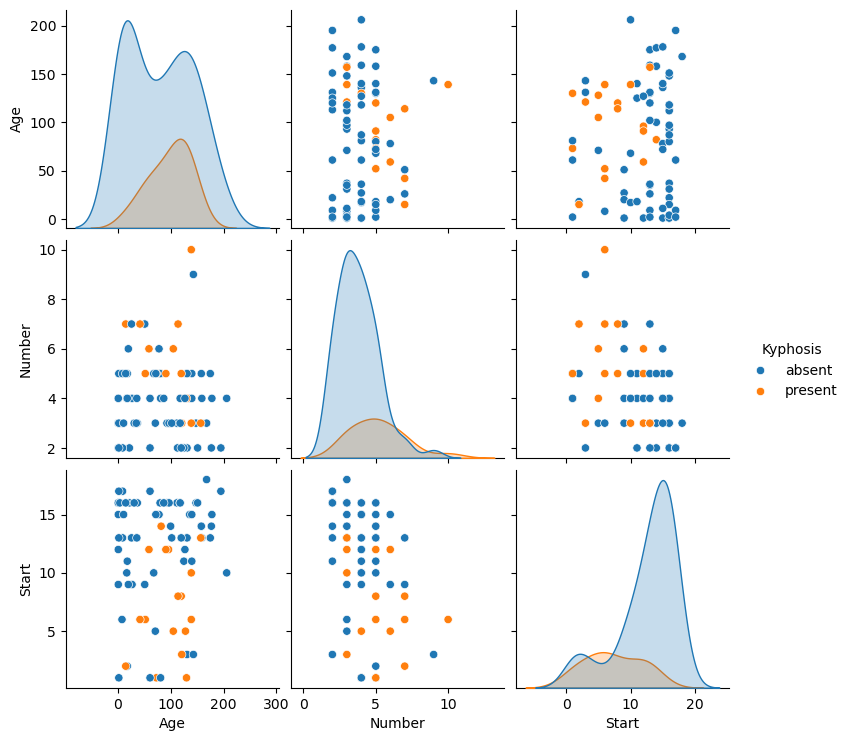

In [11]:
sns.pairplot(df, hue = 'Kyphosis')

### time for tts

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [18]:
Feature_names = df.columns[1:]
Target_names = df.columns[0].split()

In [20]:
Feature_names

Index(['Age', 'Number', 'Start'], dtype='object')

In [22]:
Target_names

['Kyphosis']

In [24]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


## Train Single Decsion Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
#call model
dtree = DecisionTreeClassifier()

In [121]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [123]:
predictions = dtree.predict(X_test)

## Classification Metrics

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

In [128]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[16  4]
 [ 3  2]]


              precision    recall  f1-score   support

      absent       0.84      0.80      0.82        20
     present       0.33      0.40      0.36         5

    accuracy                           0.72        25
   macro avg       0.59      0.60      0.59        25
weighted avg       0.74      0.72      0.73        25



In [177]:
from sklearn import tree

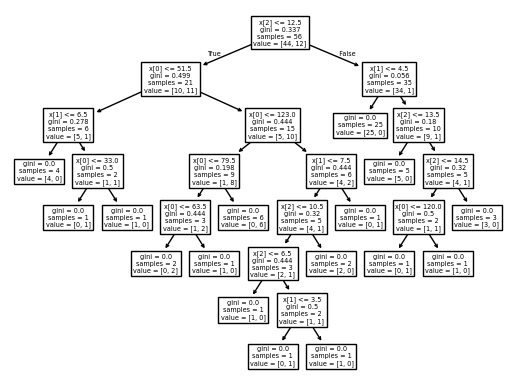

In [185]:
tree.plot_tree(dtree.fit(X_train, y_train))
plt.show()

## Random Forest Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(n_estimators = 200)

In [73]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [75]:
rfc_predictions = rfc.predict(X_test)

In [79]:
print(confusion_matrix(y_test, rfc_predictions))
print('\n')
print(classification_report(y_test, rfc_predictions))

[[19  0]
 [ 3  3]]


              precision    recall  f1-score   support

      absent       0.86      1.00      0.93        19
     present       1.00      0.50      0.67         6

    accuracy                           0.88        25
   macro avg       0.93      0.75      0.80        25
weighted avg       0.90      0.88      0.86        25



In [81]:
df['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64